                                               Class  Count
0                                 Apple___Apple_scab   1532
1                                  Apple___Black_rot   1321
2                           Apple___Cedar_apple_rust   1475
3                                    Apple___healthy   1645
4  Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...   1516
5                        Corn_(maize)___Common_rust_   1192
6                             Corn_(maize)___healthy   1162
7                Corn_(maize)___Northern_Leaf_Blight   1492


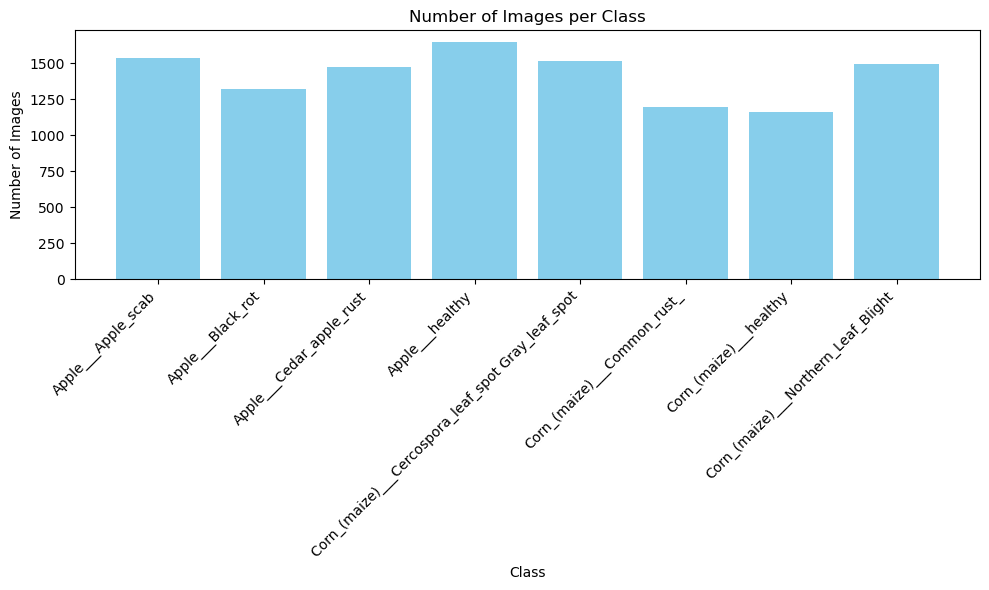

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Path to your dataset
dataset_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_Version_6"

# Dictionary to store the count of images per class
class_counts = {}

# Iterate through each class folder
for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        # Count the number of images in the class folder
        num_images = len(os.listdir(class_path))
        class_counts[class_name] = num_images

# Convert dictionary to pandas DataFrame
df = pd.DataFrame(list(class_counts.items()), columns=['Class', 'Count'])

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(df['Class'], df['Count'], color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display numerical representation
print(df)

# Show the plot
plt.show()

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from collections import defaultdict
from pathlib import Path

# Define paths
source_dir = r"C:\Users\HP\OneDrive\Desktop\Dataset_Version_6"
destination_dir = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6"
train_dir = os.path.join(destination_dir, 'train')
valid_dir = os.path.join(destination_dir, 'valid')
test_dir = os.path.join(destination_dir, 'test')

# Create destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Set split ratios
train_ratio = 0.7
valid_ratio = 0.2
test_ratio = 0.1

def split_dataset(class_dir):
    # Get list of images in the class directory
    images = [os.path.join(class_dir, img) for img in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, img))]

    if len(images) == 0:
        return [], [], []  # Return empty lists if no images are found

    # Split data into train, validation, and test sets
    train_imgs, temp_imgs = train_test_split(images, test_size=(1 - train_ratio), random_state=42)
    valid_imgs, test_imgs = train_test_split(temp_imgs, test_size=(test_ratio / (valid_ratio + test_ratio)), random_state=42)

    return train_imgs, valid_imgs, test_imgs

def copy_images(image_list, destination):
    for img_path in image_list:
        if os.path.isfile(img_path):
            shutil.copy2(img_path, destination)

def ensure_dir_exists(path):
    Path(path).mkdir(parents=True, exist_ok=True)

# Monitoring dictionary
monitoring_dict = defaultdict(lambda: {'train': 0, 'valid': 0, 'test': 0})

# Iterate through each class folder and split data
for class_name in os.listdir(source_dir):
    class_dir = os.path.join(source_dir, class_name)
    if not os.path.isdir(class_dir):
        continue

    train_imgs, valid_imgs, test_imgs = split_dataset(class_dir)

    # Skip the class if there are no images
    if len(train_imgs) == 0 and len(valid_imgs) == 0 and len(test_imgs) == 0:
        print(f"Skipping class {class_name} as it contains no images.")
        continue

    # Create class directories in train, valid, and test folders
    class_train_dir = os.path.join(train_dir, class_name)
    class_valid_dir = os.path.join(valid_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)

    ensure_dir_exists(class_train_dir)
    ensure_dir_exists(class_valid_dir)
    ensure_dir_exists(class_test_dir)

    # Copy images to respective directories
    copy_images(train_imgs, class_train_dir)
    copy_images(valid_imgs, class_valid_dir)
    copy_images(test_imgs, class_test_dir)

    # Update monitoring dictionary
    monitoring_dict[class_name]['train'] = len(train_imgs)
    monitoring_dict[class_name]['valid'] = len(valid_imgs)
    monitoring_dict[class_name]['test'] = len(test_imgs)

# Print monitoring report
print("Data Split Report:")
for class_name, counts in monitoring_dict.items():
    print(f"Class: {class_name}")
    print(f"  Train: {counts['train']} images")
    print(f"  Valid: {counts['valid']} images")
    print(f"  Test: {counts['test']} images")

Data Split Report:
Class: Apple___Apple_scab
  Train: 1072 images
  Valid: 306 images
  Test: 154 images
Class: Apple___Black_rot
  Train: 924 images
  Valid: 264 images
  Test: 133 images
Class: Apple___Cedar_apple_rust
  Train: 1032 images
  Valid: 295 images
  Test: 148 images
Class: Apple___healthy
  Train: 1151 images
  Valid: 329 images
  Test: 165 images
Class: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
  Train: 1061 images
  Valid: 303 images
  Test: 152 images
Class: Corn_(maize)___Common_rust_
  Train: 834 images
  Valid: 238 images
  Test: 120 images
Class: Corn_(maize)___healthy
  Train: 813 images
  Valid: 232 images
  Test: 117 images
Class: Corn_(maize)___Northern_Leaf_Blight
  Train: 1043 images
  Valid: 298 images
  Test: 150 images


In [1]:
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import os
import seaborn as sns
import time
import pickle
sns.set()
# This sets a common size for all the figures we will draw.
plt.rcParams['figure.figsize'] = [10, 7]


In [2]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os
from PIL import Image
import pandas as pd

In [3]:
# Define paths to your image folders
train_folder = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6\train"
valid_folder = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6\valid"
test_folder = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6\test"

In [4]:
# Function to load RGB images from a folder with labels inferred from subdirectories
def load_images(folder):
    images = []
    targets = []
    class_folders = os.listdir(folder)
    for class_folder in class_folders:
        class_path = os.path.join(folder, class_folder)
        if not os.path.isdir(class_path):
            continue  # Skip non-directory entries
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if not os.path.isfile(img_path):
                continue  # Skip non-file entries
            img = Image.open(img_path).convert('RGB')  # Keep RGB format
            img = img.resize((256, 256))
            img_array = np.array(img)
            images.append(img_array)

            # Extract target label from parent folder name (class name)
            target = class_folder
            targets.append(target)
    return np.array(images), np.array(targets)

In [5]:
# Load training, validation, and test data
input_train, target_train = load_images(train_folder)
input_valid, target_valid = load_images(valid_folder)
input_test, target_test = load_images(test_folder)

In [6]:
# Reshape data
input_train = input_train.reshape(input_train.shape[0], 256, 256, 3)  # Use 3 channels
input_valid = input_valid.reshape(input_valid.shape[0], 256, 256, 3)  # Use 3 channels
input_test = input_test.reshape(input_test.shape[0], 256, 256, 3)  # Use 3 channels
input_shape = (256, 256, 3)  # Adjust input shape for RGB images

In [7]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_valid = input_valid.astype('float32')
input_test = input_test.astype('float32')

In [8]:
# Convert into [0, 1] range
input_train = input_train / 255
input_valid = input_valid / 255
input_test = input_test / 255

In [9]:
# Create a dictionary to map string labels to numeric values
label_to_index = {label: index for index, label in enumerate(np.unique(target_train))}
# Print the label-to-index mapping
print("Label to Index Mapping:")
for label, index in label_to_index.items():
    print(f"Label: {label} -> Index: {index}")

Label to Index Mapping:
Label: Apple___Apple_scab -> Index: 0
Label: Apple___Black_rot -> Index: 1
Label: Apple___Cedar_apple_rust -> Index: 2
Label: Apple___healthy -> Index: 3
Label: Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot -> Index: 4
Label: Corn_(maize)___Common_rust_ -> Index: 5
Label: Corn_(maize)___Northern_Leaf_Blight -> Index: 6
Label: Corn_(maize)___healthy -> Index: 7


In [10]:
# Convert string labels to numeric values using label_to_index mapping
target_train_indices = np.array([label_to_index[label] for label in target_train])
target_test_indices = np.array([label_to_index[label] for label in target_test])
target_valid_indices = np.array([label_to_index[label] for label in target_valid])

In [11]:
from tensorflow.keras.utils import to_categorical

# Convert numeric labels to categorical targets
target_train_categorical = to_categorical(target_train_indices, num_classes=8)
target_valid_categorical = to_categorical(target_valid_indices, num_classes=8)
target_test_categorical = to_categorical(target_test_indices, num_classes=8)
# Print the shape of data and targets after preprocessing
print("Input shape (train):", input_train.shape)
print("Input shape (validation):", input_valid.shape)
print("Input shape (test):", input_test.shape)
print("Target shape (train):", target_train_categorical.shape)
print("Target shape (validation):", target_valid_categorical.shape)
print("Target shape (test):", target_test_categorical.shape)

Input shape (train): (7930, 256, 256, 3)
Input shape (validation): (2265, 256, 256, 3)
Input shape (test): (1139, 256, 256, 3)
Target shape (train): (7930, 8)
Target shape (validation): (2265, 8)
Target shape (test): (1139, 8)


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(8, activation='softmax'))

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(input_train, target_train_categorical,
                    epochs=5, batch_size=32,
                    validation_data=(input_valid, target_valid_categorical))

Epoch 1/5
248/248 [==============================] - 907s 4s/step - loss: 0.9535 - accuracy: 0.6338 - val_loss: 0.4395 - val_accuracy: 0.8265
Epoch 2/5
248/248 [==============================] - 730s 3s/step - loss: 0.3594 - accuracy: 0.8573 - val_loss: 0.2890 - val_accuracy: 0.8923
Epoch 3/5
248/248 [==============================] - 767s 3s/step - loss: 0.2917 - accuracy: 0.8852 - val_loss: 0.3456 - val_accuracy: 0.8742
Epoch 4/5
248/248 [==============================] - 734s 3s/step - loss: 0.2019 - accuracy: 0.9217 - val_loss: 0.2546 - val_accuracy: 0.9121
Epoch 5/5
248/248 [==============================] - 665s 3s/step - loss: 0.1236 - accuracy: 0.9533 - val_loss: 0.2162 - val_accuracy: 0.9276


In [16]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(input_test, target_test_categorical)

# Print test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

36/36 [==============================] - 37s 1s/step - loss: 0.2221 - accuracy: 0.9148
Test Loss: 0.22210951149463654
Test Accuracy: 0.9148375988006592


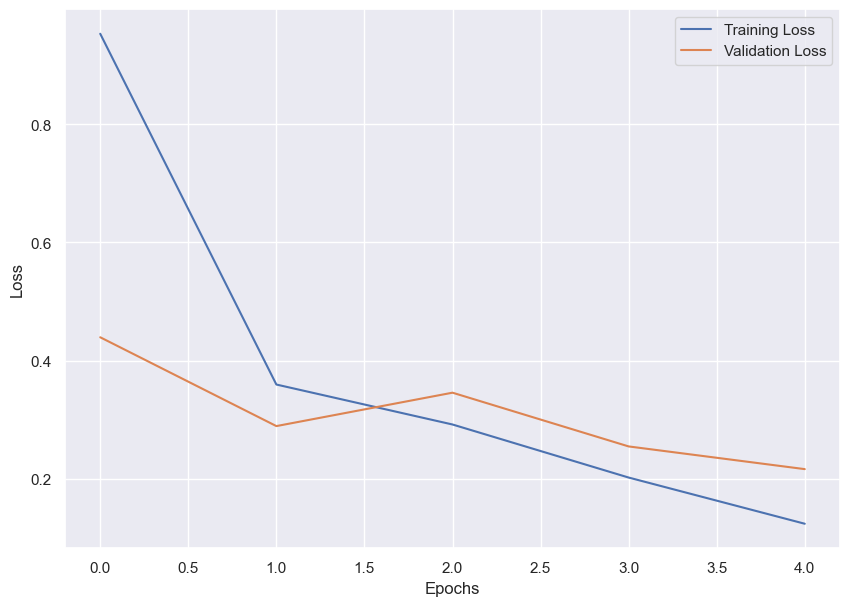

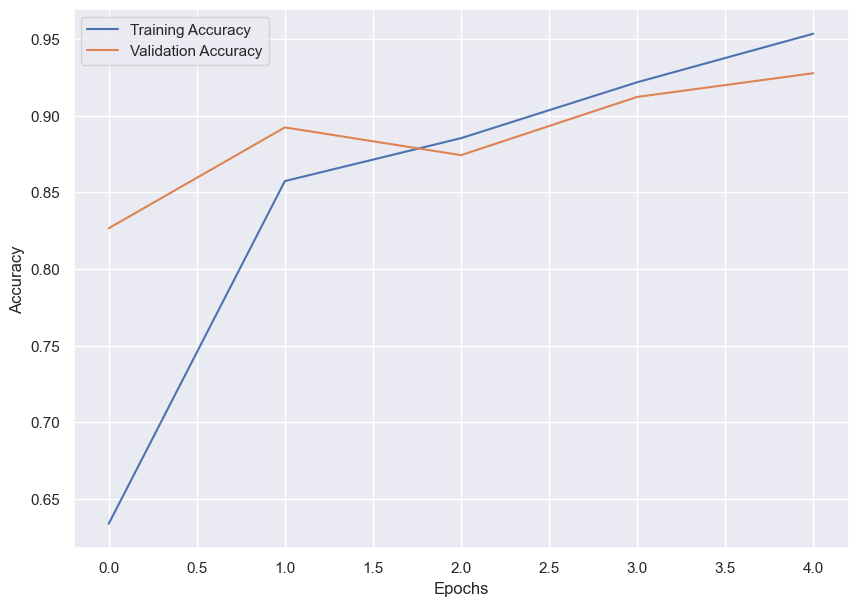

In [17]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report

# Make predictions on test data
predictions = model.predict(input_test)

# Convert predictions from one-hot encoded format to class labels
predicted_classes = np.argmax(predictions, axis=1)

# Convert true labels from one-hot encoded format to class labels
true_classes = np.argmax(target_test_categorical, axis=1)

# Generate classification report
report = classification_report(true_classes, predicted_classes)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       154
           1       0.94      0.98      0.96       133
           2       0.94      0.98      0.96       148
           3       0.99      0.88      0.93       165
           4       0.83      0.77      0.80       152
           5       1.00      0.97      0.99       120
           6       0.79      0.85      0.82       150
           7       1.00      0.99      1.00       117

    accuracy                           0.91      1139
   macro avg       0.92      0.92      0.92      1139
weighted avg       0.92      0.91      0.91      1139



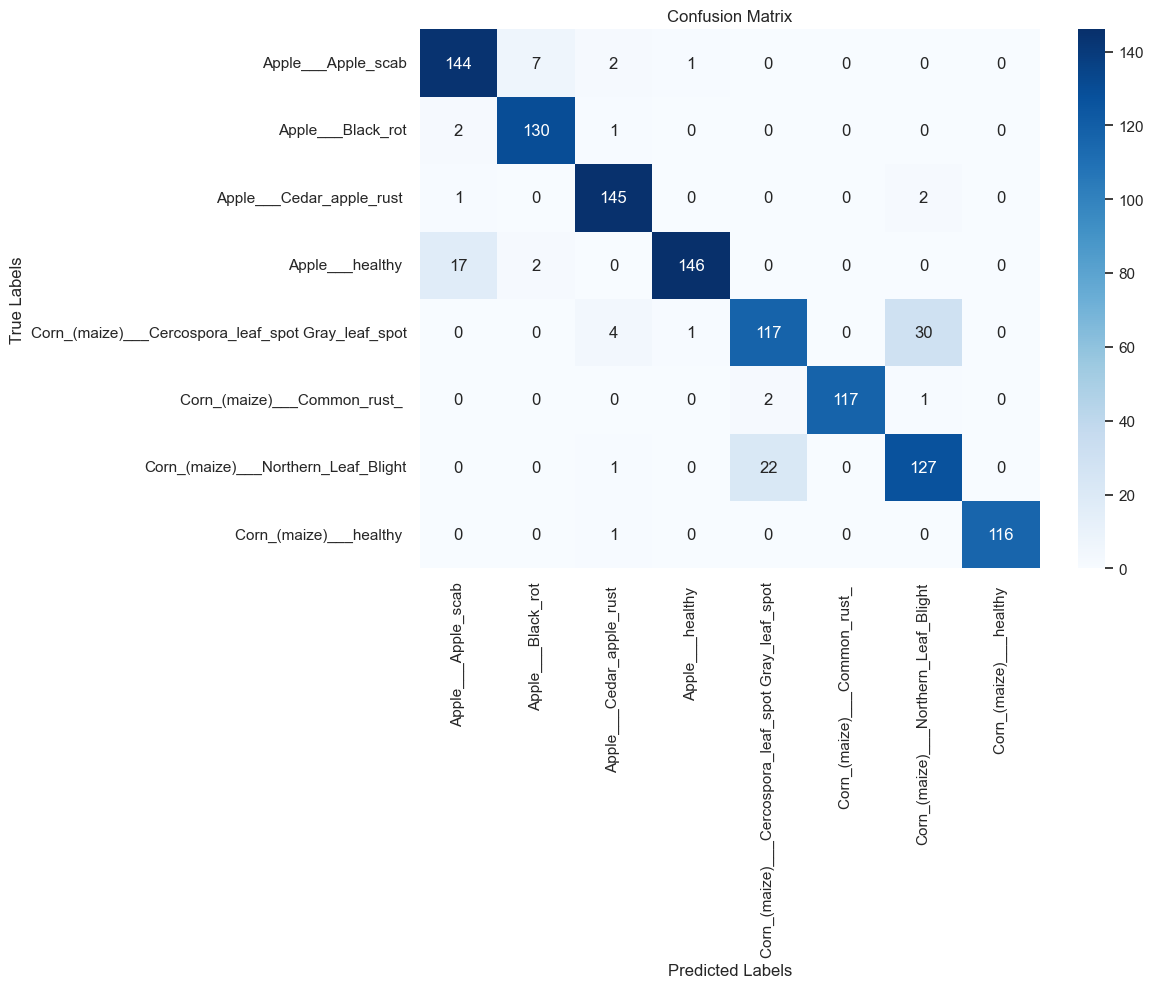

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define the classes
classes = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust ','Apple___healthy ','Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot','Corn_(maize)___Common_rust_ ','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy ']  # Replace with your class names

# Get the true class labels for the test set
true_labels = [label_to_index[label] for label in target_test]

# Get the predicted class labels for the test set
predicted_labels = [np.argmax(prediction) for prediction in model.predict(input_test)]

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


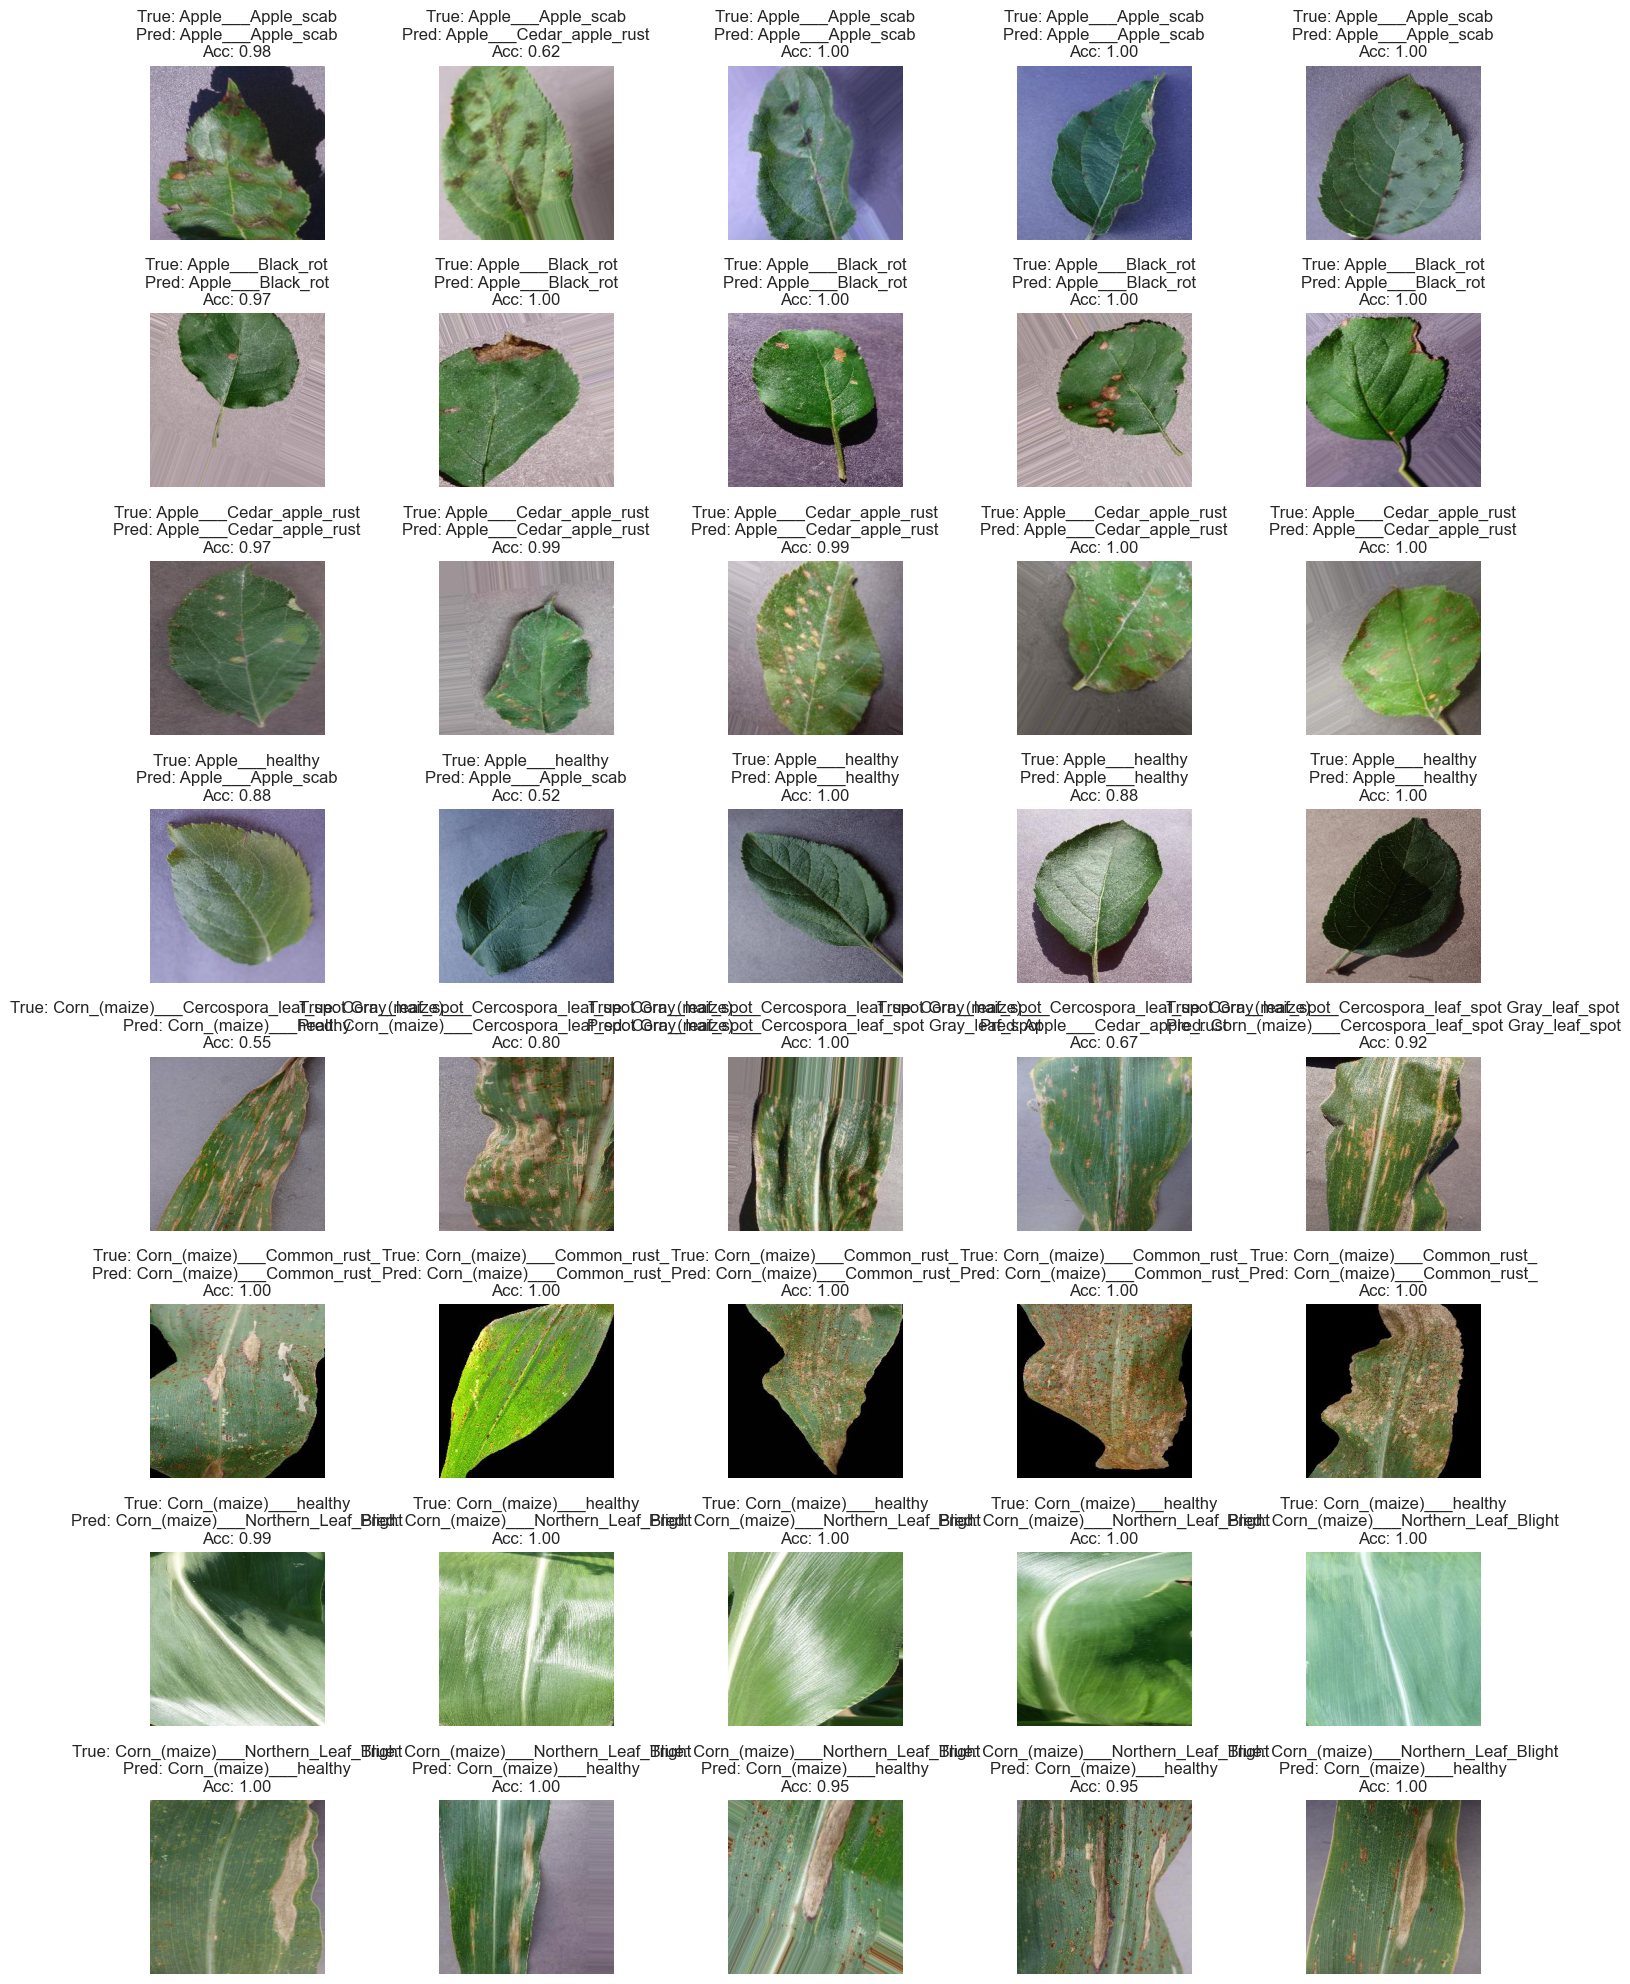

In [25]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image as keras_image

# Define the path to the test directory
test_dir = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6\test"

# Define the classes
classes = os.listdir(test_dir)

# Create a dictionary to store the paths of images for each class
class_image_paths = {cls: [] for cls in classes}

# Populate the dictionary with image paths
for cls in classes:
    class_dir = os.path.join(test_dir, cls)
    class_images = os.listdir(class_dir)
    class_image_paths[cls] = [os.path.join(class_dir, img) for img in class_images]

# Take random 5 images from each class
random_images = []
for cls in classes:
    random_images.extend(random.sample(class_image_paths[cls], 5))

# Create subplots in a grid of 5 columns and 8 rows
fig, axs = plt.subplots(8, 5, figsize=(15, 20))

# Iterate over the subplots
for i, ax in enumerate(axs.flat):
    # Load the image
    image_path = random_images[i]
    image = keras_image.load_img(image_path, target_size=(256, 256))
    # Preprocess the image
    image_array = keras_image.img_to_array(image)
    image_array = image_array / 255.0
    image_array = image_array.reshape((1, 256, 256, 3))  # Add batch dimension

    # Get the true class name
    true_class = os.path.basename(os.path.dirname(image_path))

    # Use the model to predict class probabilities for the image
    predictions = model.predict(image_array)
    # Determine the predicted class label based on the highest probability
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = classes[predicted_class_index]  # Get the class name based on the index
    # Get the predicted class probability
    predicted_probability = predictions[0][predicted_class_index]

    # Plot the image with its corresponding class name and prediction accuracy
    ax.imshow(image)
    ax.set_title(f"True: {true_class}\nPred: {predicted_class_name}\nAcc: {predicted_probability:.2f}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [23]:
# Define the directory where you want to save the model
save_dir = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6"

# Define the filename for the model
model_filename = 'my_model.h5'

# Save the model to the specified directory
model.save(os.path.join(save_dir, model_filename))

print(f"Model saved to: {os.path.join(save_dir, model_filename)}")


Model saved to: C:\Users\HP\OneDrive\Desktop\Dataset_V_6\my_model.h5


In [27]:

import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

# Define the path to the image you want to test
test_image_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6\corn-leaf-8253_1280.jpg"

# Load and preprocess the image
image = keras_image.load_img(test_image_path, target_size=(256, 256))
image_array = keras_image.img_to_array(image)
image_array = image_array / 255.0
image_array = image_array.reshape((1, 256, 256, 3))  # Add batch dimension

# Use the model to make predictions
predictions = model.predict(image_array)

# Determine the predicted class label based on the highest probability
predicted_class_index = np.argmax(predictions)
predicted_class_name = classes[predicted_class_index]  # Get the class name based on the index

# Print the prediction for the image
print(f"Predicted Class: {predicted_class_name}")


Predicted Class: Corn_(maize)___Northern_Leaf_Blight


In [28]:

import numpy as np
from tensorflow.keras.preprocessing import image as keras_image

# Define the path to the image you want to test
test_image_path = r"C:\Users\HP\OneDrive\Desktop\Dataset_V_6\download.jpg"

# Load and preprocess the image
image = keras_image.load_img(test_image_path, target_size=(256, 256))
image_array = keras_image.img_to_array(image)
image_array = image_array / 255.0
image_array = image_array.reshape((1, 256, 256, 3))  # Add batch dimension

# Use the model to make predictions
predictions = model.predict(image_array)

# Determine the predicted class label based on the highest probability
predicted_class_index = np.argmax(predictions)
predicted_class_name = classes[predicted_class_index]  # Get the class name based on the index

# Print the prediction for the image
print(f"Predicted Class: {predicted_class_name}")

Predicted Class: Apple___Apple_scab
